# Part II - A Comprehensive Analysis Into the Exploration of Loan Default Rates
## by Nasser Kaze

## Investigation Overview

I sought to observe the factors that have a strong influence on loan default rate which could proof very helpful to determine the credit scores and mitigating risks of loan default.


## Dataset Overview

The data consists of 113,937 loans with 81 variables on each loan including loan amount, borrower(interest) rate, current loan status, borrower income, and many others. Some variables had to be simplified or summarized into smaller categories to make the analysis clearer and understandable. There are also so many variables, it would be too cumbersome to investigate them all. So the study focused on a few variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import CategoricalDtype

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv("ProsperLoanData.csv")

ListingCategory = {
    0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use',
    6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
    11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental',
    16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation',  20: 'Wedding Loans'
}

loans['ListingCategory'] = loans['ListingCategory (numeric)'].apply(lambda x: ListingCategory[x])
loans['ListingCategory'] = loans['ListingCategory'].astype('str').astype('category')
loans = loans.drop(['ListingCategory (numeric)'], axis=1)


# Simplify the loan status into `Completed` and `Defaulted`
m = {
    'Completed': 'Completed', 'FinalPaymentInProgress': 'Completed', 'Current': 'Current', 
    'Defaulted': 'Defaulted', 'Chargedoff': 'Defaulted', 'Cancelled': 'Defaulted',
    'Past Due (1-15 days)': 'Overdue', 'Past Due (16-30 days)': 'Overdue', 'Past Due (61-90 days)': 'Overdue',
    'Past Due (31-60 days)': 'Overdue', 'Past Due (91-120 days)': 'Overdue', 'Past Due (>120 days)': 'Overdue'
}

loans['LoanStatus'] = loans['LoanStatus'].map(m).astype('category')

loans = loans[loans['LoanStatus'].isin(['Completed', 'Defaulted'])]
loans['LoanStatus'] = loans['LoanStatus'].astype('str').astype('category')



# Simplify the employment status into `Employed`, `Unemployed`, `Retired` and `Other`
m = { 
    'Self-employed': 'Employed', 'Full-time': 'Employed', 'Part-time': 'Employed', 'Employed': 'Employed',
    'Not employed': 'Unemployed', 'Retired': 'Retired', 'Other': 'Other'
}

loans['EmploymentStatus'] = loans['EmploymentStatus'].map(m).astype('category')


# Joins `Not Employed` and `$0` income range.
m = {
    'Not employed': '$0',
    '$0': '$0',
    '$1-24,999': '$1-24,999',
    '$25,000-49,999': '$25,000-49,999',
    '$50,000-74,999': '$50,000-74,999',
    '$75,000-99,999': '$75,000-99,999',
    '$100,000+': '$100,000+'
}

loans['IncomeRange'] = loans['IncomeRange'].map(m).astype(CategoricalDtype(ordered=True,
                                                categories=['$0', '$1-24,999', '$25,000-49,999',
                                                 '$50,000-74,999', '$75,000-99,999', '$100,000+']))


# convert Prosper Rating, Credit Grade, Income Range and Loan Origination Quarter into ordered categorical values.
loans['LoanOriginationQuarter'] = loans['LoanOriginationQuarter'].astype(CategoricalDtype(ordered = True,
                                            categories = [
                                                 'Q4 2005',
                                                 'Q1 2006','Q2 2006','Q3 2006','Q4 2006',
                                                 'Q1 2007','Q2 2007','Q3 2007','Q4 2007',
                                                 'Q1 2008','Q2 2008','Q3 2008','Q4 2008',
                                                 'Q2 2009','Q3 2009','Q4 2009',
                                                 'Q1 2010','Q2 2010','Q3 2010','Q4 2010',
                                                 'Q1 2011','Q2 2011','Q3 2011','Q4 2011',
                                                 'Q1 2012','Q2 2012','Q3 2012','Q4 2012',
                                                 'Q1 2013','Q2 2013','Q3 2013','Q4 2013',
                                                 'Q1 2014'
                                            ]))
    

loans['LoanGrade'] = loans['CreditGrade'].combine_first(loans['ProsperRating (Alpha)'])
loans['LoanGrade'] = loans['LoanGrade'].astype(CategoricalDtype(ordered=True, categories=['HR','E','D','C','B','A','AA']))

loans['Occupation'] = loans['Occupation'].map(m).astype('category')



## Percentage Of Loans by Status

The loan status shows the default rate of the loans with defaulted loans making up 30 percent of the dataset and Completed or Fully paid loans making up the remaining 70 percent which can be observed on the pie chart below.

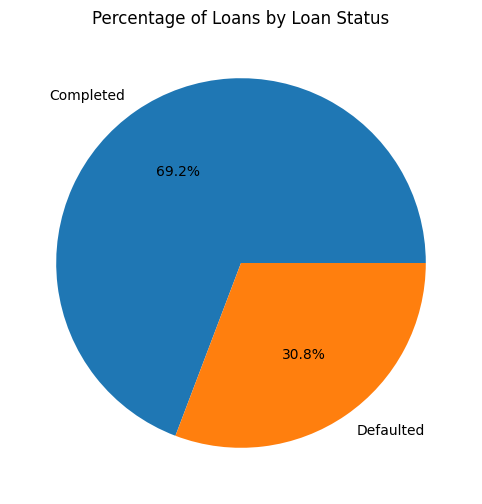

In [3]:
# Get the count and percentage of loans by loan status
loan_status_count = loans['LoanStatus'].value_counts()
loan_status_percent = loans['LoanStatus'].value_counts(normalize=True) * 100

# Visualize the count and percentage of loans by loan status using a pie chart
plt.figure(figsize=(10,6))
plt.pie(loan_status_count, labels=loan_status_count.index, autopct='%1.1f%%')
plt.title('Percentage of Loans by Loan Status')
plt.show()

## Percentage Of Loans By Home Ownership Status

Home Ownership have a more balanced distribution with `47%` being home owners and the remaining `53%` non-home owners.
This is can be seen in the Pie Chart below.

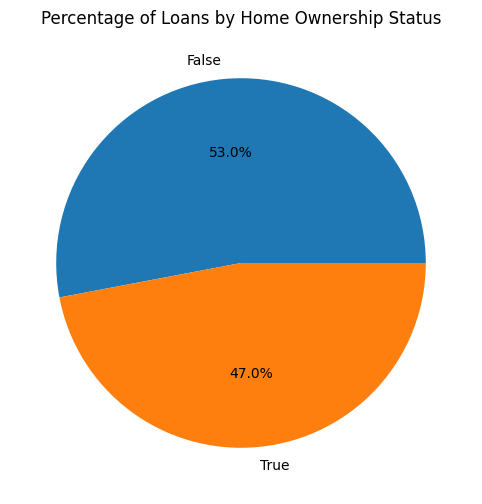

In [4]:
# Get the count and percentage of loans by home ownership status
home_ownership_count = loans['IsBorrowerHomeowner'].value_counts()
home_ownership_percent = loans['IsBorrowerHomeowner'].value_counts(normalize=True) * 100

# Visualize the count and percentage of loans by home ownership status using a pie chart
plt.figure(figsize=(10,6))
plt.pie(home_ownership_count, labels=home_ownership_count.index, autopct='%1.1f%%')
plt.title('Percentage of Loans by Home Ownership Status')
plt.show()

## Distribution of Income Ranges

Income Ranges between `$25,000` and `$50,000` have the largest range of values. Follows is a step wise drop with increase in Income Range.
The dataset also features very small `$0` income earners and also small low income earners in the range $1 to `$25,000`.

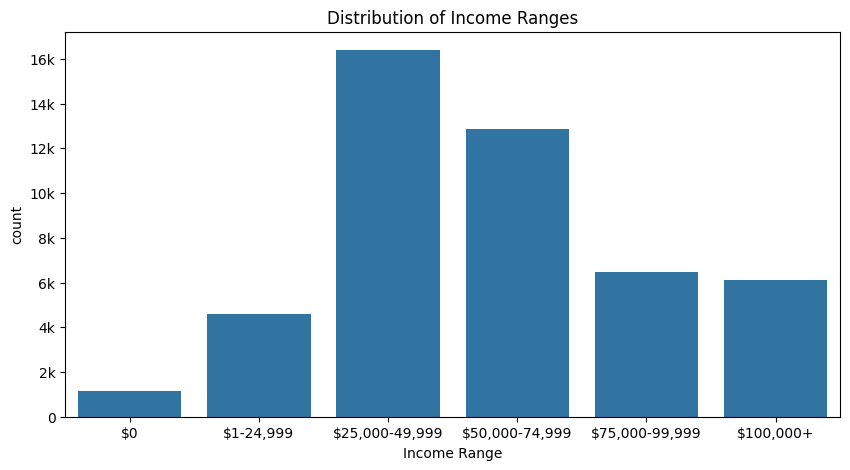

In [5]:
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data=loans, x='IncomeRange', color=default_color)
plt.yticks([0, 2e3, 4e3, 6e3, 8e3, 1e4, 1.2e4, 1.4e4, 1.6e4], [0, '2k', '4k', '6k', '8k', '10k', '12k', '14k', '16k'])
plt.title("Distribution of Income Ranges")
plt.xlabel('Income Range')
plt.show()

## Distribution of Loan Grades

A bar plot of the distribution of Loan Grades shows that Loans with grade `D` and `C` are more popular among borrowers. The other loan grades where almost equally requested.

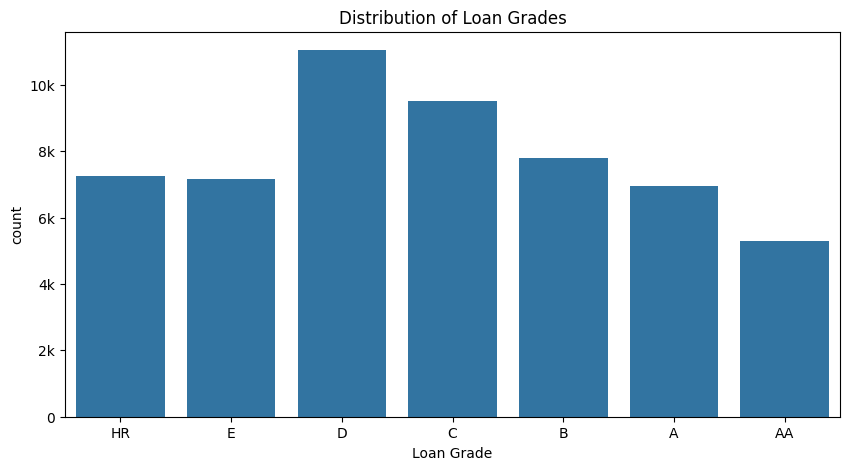

In [6]:
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data=loans, x='LoanGrade', color=default_color)
plt.yticks([0, 2e3, 4e3, 6e3, 8e3, 1e4], [0, '2k', '4k', '6k', '8k', '10k'])
plt.title("Distribution of Loan Grades")
plt.xlabel('Loan Grade')
plt.show()

## Distribution of Loan Amount

The distribution of the loan amount is skewed to the right. When observed on a log scale, we notice a concentration of loans below `$5,000`.
The frequency steadily drops as the amount increases with a few show outbursts at `$10,000`, `$15,000` and `$25,000`.

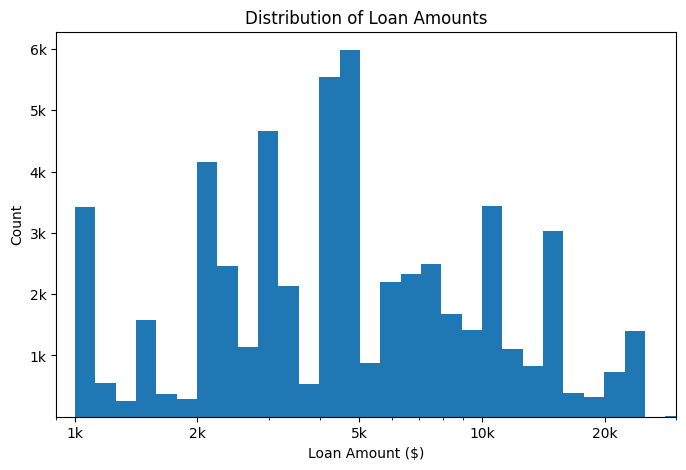

In [7]:
# Put the plot on a log scale to better visualize the values on the right

log_binsize = 0.05
bins = 10 ** np.arange(3, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins)
plt.xscale('log')
plt.xlim([9e2, 3e4])
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k', '5k', '10k', '20k'])
plt.yticks([1e3, 2e3, 3e3, 4e3, 5e3, 6e3], ['1k', '2k', '3k', '4k', '5k', '6k'])
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Count")

plt.show()


## Loan Amount vs. Income Range

Grouping and plotting the Loan Amount by Income Range, We can see that borrowers with higher incomes tend to have larger loans as depicted with the steady increment step in loan amounts with increase in the income range.
We can also observe large loans among `$0` income earners which suggests a need  for financial support given the income as expected.

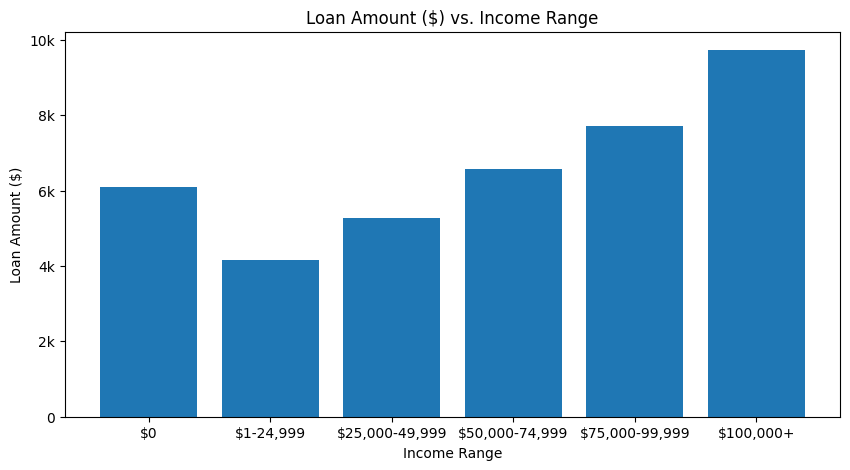

In [8]:
income_range_loans = loans.groupby('IncomeRange').mean()

plt.figure(figsize=[10, 5])

plt.bar(x=income_range_loans.index, height=income_range_loans['LoanOriginalAmount'])
plt.yticks([0, 2e3, 4e3, 6e3, 8e3, 1e4], [0, '2k', '4k', '6k', '8k', '10k'])
plt.title("Loan Amount ($) vs. Income Range")
plt.xlabel('Income Range')
plt.ylabel('Loan Amount ($)')
plt.show()

## Loan Amount and Loan Grade by Loan Status

Plotting the Loan Amount against the Loan Grade with Loan Status as hue, shows an in defaulted loans with an increase in loan grade.
This indicates that Loan Grade is a strong predictor of loan default as loans with higher grades appear to be riskier.
This also indicates a relationship between the loan amount and the loan default rate with higher default rate at higher loan amounts inficating that borrowers that take large loan amounts are likely to default.


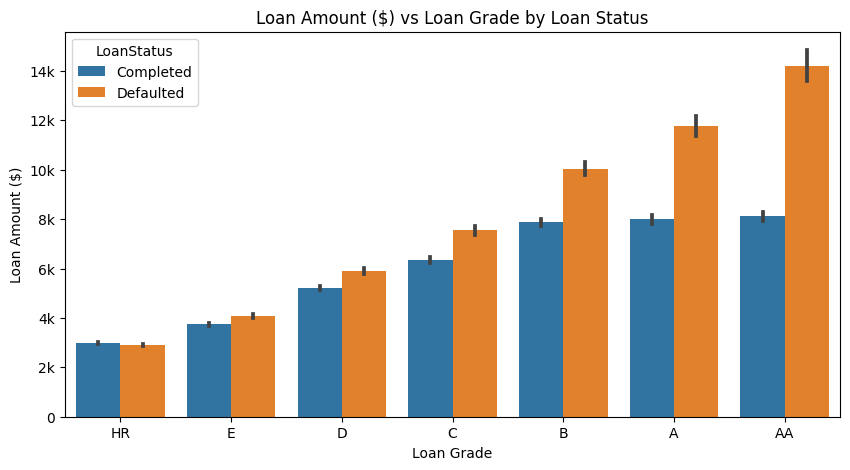

In [9]:
plt.figure(figsize=[10, 5])

sb.barplot(x='LoanGrade', y='LoanOriginalAmount', data=loans, hue='LoanStatus')
plt.yticks([0, 2e3, 4e3, 6e3, 8e3, 1e4, 1.2e4, 1.4e4], [0, '2k', '4k', '6k', '8k', '10k', '12k', '14k'])
plt.title("Loan Amount ($) vs Loan Grade by Loan Status")
plt.ylabel("Loan Amount ($)")
plt.xlabel("Loan Grade")
plt.show()

## Loan Amount and Loan Purpose by Loan Status

Investigating the impact of the loan amount with respect to the loan purpose with the Loan Status also show that the loan purpose is a significant factor in determining loan amounts as well as default rates.
We can see for the case of loans taken for boats, we observe that loans taken below the median value of `$8,000` had lower default and the default is higher above the median.
We can also observe a the case of loans taken for cosmetic procedures. Smaller amounts at `$3,000` had lower default rates and default rate increased as the amount borrowed increased.

Overall, we can see that depending on the purpose of the loan, the amount borrowed could have a strong impact on the default rate.



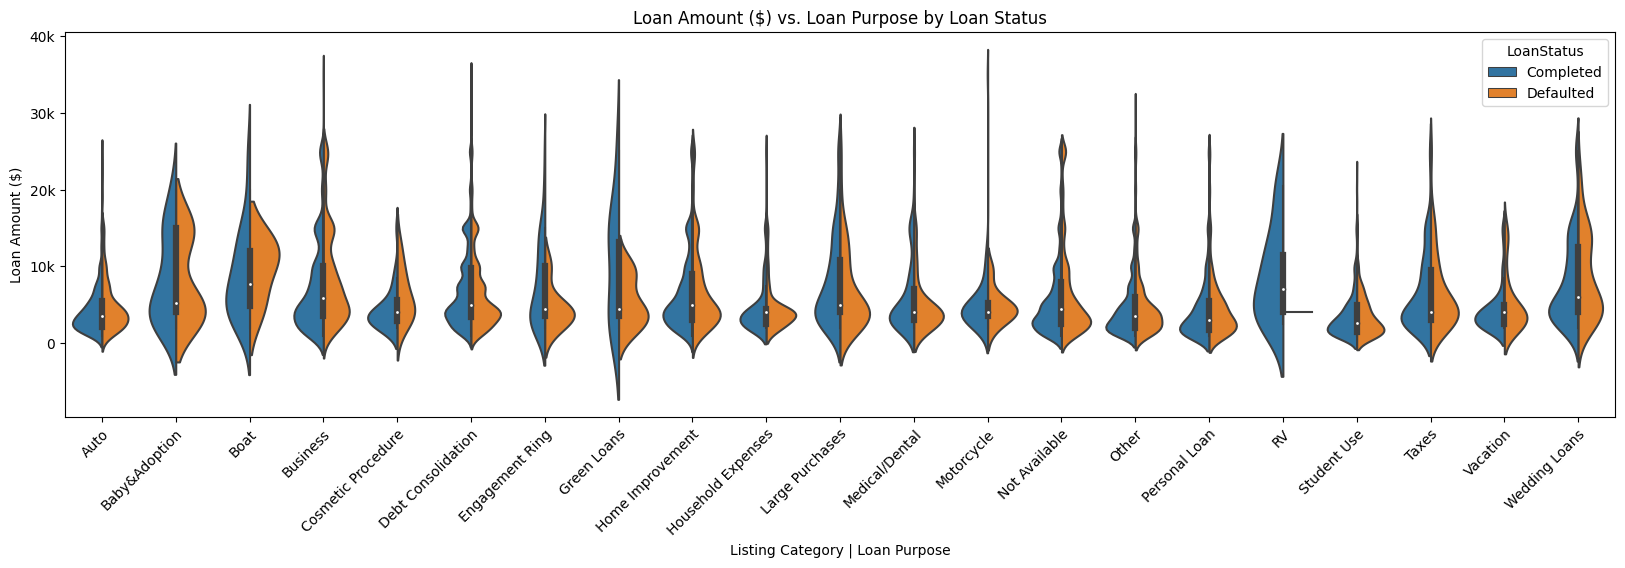

In [10]:
# Investigate with a violin plot to better observe the rates with the smaller loan amounts and frequency.
plt.figure(figsize = [20, 5])

# Plot violin plot of loan purpose and loan amount by default status
sb.violinplot(x="ListingCategory", y="LoanOriginalAmount", hue="LoanStatus", data=loans, split=True)

plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.yticks([0, 1e4, 2e4, 3e4, 4e4], [0, '10k', '20k', '30k', '40k'])
plt.title("Loan Amount ($) vs. Loan Purpose by Loan Status")
plt.xlabel("Listing Category | Loan Purpose")
plt.ylabel("Loan Amount ($)")

plt.show()

In [11]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 981943 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
